In [14]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

50 4.6361579055242705 2.852164566082978
100 5.1339416461700305 2.904916618631497
200 5.041494298057902 2.7093422894872843
300 4.789961496947283 3.046819198082166
500 4.643211841244348 2.8600402624135444


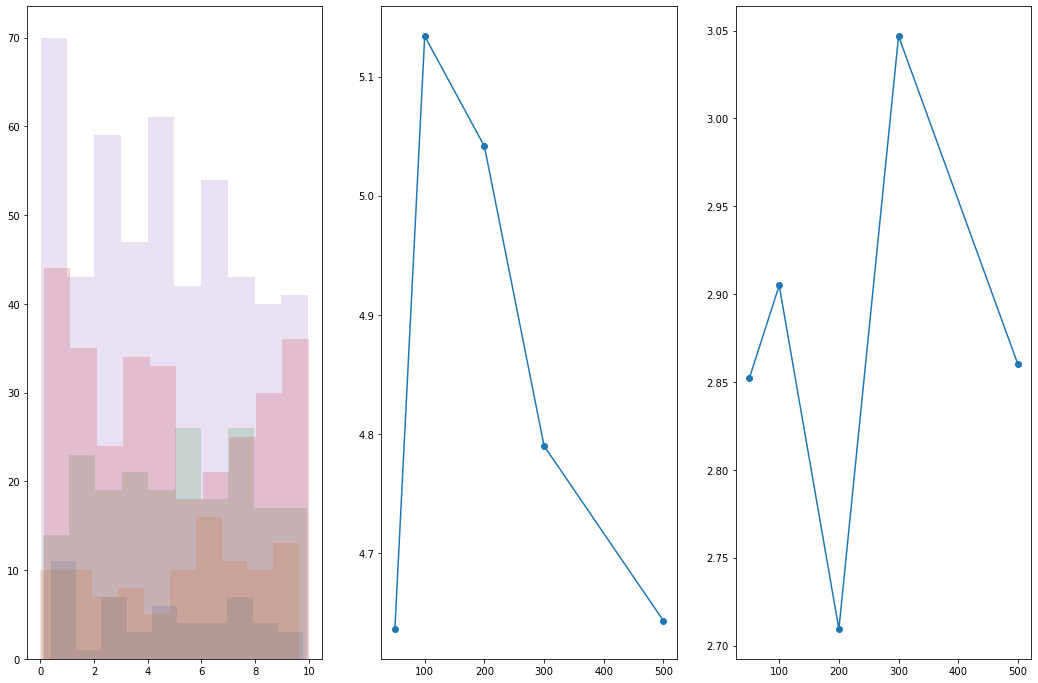

In [11]:
dose_limit = 10.0
px=[]
py=[]
pz=[]

fig,axes = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(18,12))

for redundancy in [50,100,200,300,500]:
    # B average
    b_array=[]

    for i in range(0, redundancy):
        # B-factor (randome)
        tmp_b = random.uniform(0, dose_limit)
#         print(tmp_b)
        b_array.append(tmp_b)

    nb=np.array(b_array)
    print(redundancy, nb.mean(), nb.std())

    px.append(redundancy)
    py.append(nb.mean())
    pz.append(nb.std())
    axes[0].hist(nb, alpha=0.2)
axes[1].plot(px,py,'o-')
axes[2].plot(px,pz,'o-')

Text(0.5, 0, 'B$_{damage}$')

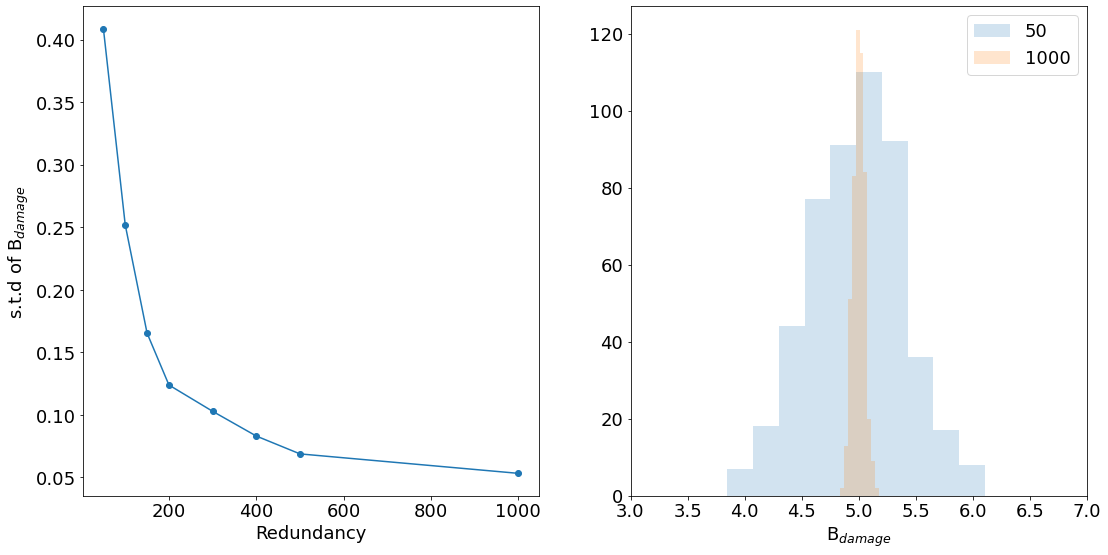

In [74]:
dose_limit = 10.0
px=[]
py=[]
pz=[]

fig,axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,9))
plt.rcParams["font.size"]=18
redundancy=100

refl_info=[]

for n_reflections in range(0,500):
    # B average
    b_array=[]

    # For each reflection redundant measurements will be simulated.
    for redundancy in [50,100,150,200,300,400,500,1000]:
        for i in range(0, redundancy):
            # B-factor (randome)
            tmp_b = random.uniform(0, dose_limit)
            b_array.append(tmp_b)

        nb=np.array(b_array)
        # Saving the average B-factor (B_damage)
        b_damage = nb.mean()
        sig_b_damage = nb.std()
        
        # Saving the information
        # n th reflection: mean(B), sig(B) at this redundancy
        refl_info.append((n_reflections, redundancy, b_damage, sig_b_damage))

df = pd.DataFrame(data=refl_info,columns=['refl_index', 'redun', 'b_mean', 'sig_b'])
df

# Grouping
px=[]
py=[]
for redun, newdf in df.groupby('redun'):
    Bdamage=newdf['b_mean'].mean()
    sigBdamage=newdf['b_mean'].std()
    px.append(redun)
    py.append(sigBdamage)
    pz.append(Bdamage)
    if redun == 50 or redun==1000:
        axes[1].hist(newdf['b_mean'], alpha=0.2, label="%d"%redun)

axes[0].plot(px,py,'o-')
axes[0].set_xlabel("Redundancy")
axes[0].set_ylabel("s.t.d of B$_{damage}$")
axes[1].set_xlim([3,7])
axes[1].legend()
axes[1].set_xlabel("B$_{damage}$")